In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### West African Population as at 2022 

In [52]:
# Import world_population_csv data 
df = pd.read_csv(r'C:\Users\user\Downloads\world_population.csv')
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [53]:
df.sample(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
198,32,SDN,Sudan,Khartoum,Africa,46874204,44440486,38171178,33739933,26298773,21090886,16673586,11305206,1886068,24.8529,1.0267,0.59
25,137,BIH,Bosnia and Herzegovina,Sarajevo,Europe,3233526,3318407,3524324,3811088,4179350,4494310,4199820,3815561,51209,63.1437,0.9886,0.04
227,51,VEN,Venezuela,Caracas,South America,28301696,28490453,30529716,28715022,24427729,19750579,15210443,11355475,916445,30.8820,1.0036,0.35
153,210,NFK,Northern Mariana Islands,Saipan,Oceania,49551,49587,51514,54087,80338,48002,17613,10143,464,106.7909,1.0014,0.00
179,188,WSM,Samoa,Apia,Oceania,222382,214929,203571,194672,184008,168186,164905,142771,2842,78.2484,1.0165,0.00


In [41]:
# No null data
# Duplicated data

print('duplicated data:', df.duplicated().sum())

duplicated data: 0


### 16 West African Countries

In [54]:


West_Africa = ['Benin', 'Burkina Faso', 'Cape Verde', 'The Gambia', 'Ghana', 
               'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Liberia', 'Mali', 
               'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone','Togo']

df_West_Africa = df[df.Country.isin(West_Africa)]

# Rename the West_Africa column and (replace space in columns with_)
for col in df_West_Africa.columns:
    df_West_Africa.rename(columns = {col:col.replace(' ', '_')}, inplace = True)
    
# Round Density_(per_km²)
df_West_Africa['Density_(per_km²)'] = round(df_West_Africa['Density_(per_km²)']).astype('int64')

# Ranking 
df_West_Africa = df_West_Africa.loc[]sort_values(['Rank'], ascending = False)
df_West_Africa;

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-54-5f5c7920af7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_West_Africa['Density_(per_km²)'] = round(df_West_Africa['Density_(per_km²)']).astype('int64')


### Map of West Africa

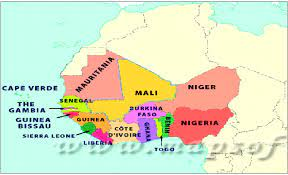

                                                                                                                    

In [43]:
# melt dataframe for chloreopleth
df_melt = pd.melt(df_West_Africa, id_vars=['Country','CCA3'], value_vars=['2022_Population',
                                                                          '2020_Population','2015_Population',
                                                                          '2010_Population',
                                                '2000_Population', '1990_Population',
                                                                          '1980_Population', '1970_Population'],
        var_name='Year', value_name='Population')

# Extract numbers, split Year column
df_melt['Year'] = df_melt['Year'].str.split('_', expand = True)
df_melt.sort_values('Year', ascending = False, inplace = True)
df_melt

,Country,CCA3,Year,Population
0,Cape Verde,CPV,2022,593149
8,Senegal,SEN,2022,17316449
1,Guinea-Bissau,GNB,2022,2105566
14,Nigeria,NGA,2022,218541212
13,Ghana,GHA,2022,33475870
...,...,...,...,...
108,Liberia,LBR,1970,1463563
107,Mauritania,MRT,1970,1122198
106,Guinea-Bissau,GNB,1970,591663
105,Cape Verde,CPV,1970,287262


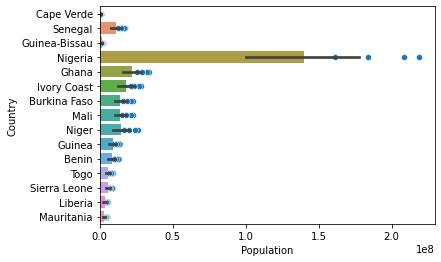

In [44]:
# Scatter plot and Barplot Visualization

sns.scatterplot(y = 'Country', x = 'Population', data = df_melt);
sns.barplot(y = 'Country', x = 'Population', data = df_melt);

In [15]:
# Exploratory Data Analysis

viz_2022 = df_West_Africa[['Rank','Country','2022_Population',
        'Density_(per_km²)','Area_(km²)','Growth_Rate',
        'World_Population_Percentage']].sort_values(['Rank'])

viz_2022.rename(columns = {'World_Population_Percentage':'World_Pop(%)'}, inplace = True)
viz_2022

,Rank,Country,2022_Population,Density_(per_km²),Area_(km²),Growth_Rate,World_Pop(%)
149,6,Nigeria,218541212,237,923768,1.0241,2.74
75,47,Ghana,33475870,140,238533,1.0196,0.42
100,52,Ivory Coast,28160542,87,322463,1.0248,0.35
148,54,Niger,26207977,21,1267000,1.0378,0.33
31,58,Burkina Faso,22673762,83,272967,1.0259,0.28
124,59,Mali,22593590,18,1240192,1.0314,0.28
183,72,Senegal,17316449,88,196722,1.0261,0.22
84,75,Guinea,13859341,56,245857,1.0242,0.17
21,77,Benin,13352864,119,112622,1.0274,0.17
208,100,Togo,8848699,156,56785,1.0236,0.11


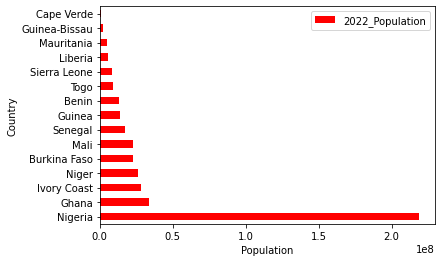

In [45]:
# Visualizations of West AFrican Population - 2022

viz_2022.plot(x = 'Country', y = '2022_Population', kind = 'barh', color = 'r')
plt.xlabel('Population')
plt.ylabel('Country')
         
plt.show()

In [24]:
# Summary Statistics in West Africa

West_Africa_Summary = viz_2022[['Rank', 'Area_(km²)','Density_(per_km²)','Growth_Rate','World_Pop(%)']].describe().round(1)
West_Africa_Summary



,Rank,Area_(km²),Density_(per_km²),Growth_Rate,World_Pop(%)
count,15.0,15.0,15.0,15.0,15.0
mean,84.6,408725.1,92.2,1.0,0.4
std,43.5,456893.9,62.4,0.0,0.7
min,6.0,4033.0,5.0,1.0,0.0
25%,56.0,91554.5,52.0,1.0,0.1
50%,75.0,238533.0,87.0,1.0,0.2
75%,111.5,623115.5,130.0,1.0,0.3
max,171.0,1267000.0,237.0,1.0,2.7


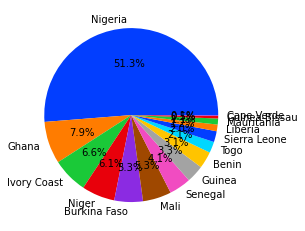

In [46]:
# Piechart Visualization

#define data to use
data_wa = viz_2022['2022_Population'] 

#define label to use
labels_wa = viz_2022['Country']

# define Seaborn color to use
colors = sns.color_palette('bright')[0:15]


plt.pie(data_wa, labels = labels_wa, colors = colors, autopct='%1.1f%%')

plt.show()


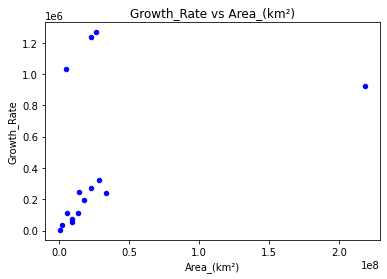

In [25]:
# Scatter plot of relationshipm bewteen Area_km and Population

viz_2022.plot(y = 'Area_(km²)', x = '2022_Population', kind = 'scatter', color = 'b')
plt.xlabel('Area_(km²)')
plt.ylabel('Growth_Rate')
plt.title('Growth_Rate vs Area_(km²)')
         
plt.show()

In [72]:
# Population per square meter

pop = viz_2022[['Country','2022_Population', 'Area_(km²)','Growth_Rate']]

pop['Pop_per_(km²)'] = viz_2022['2022_Population'] / viz_2022['Area_(km²)']

pop_sqm = pop.sort_values('Pop_per_(km²)', ascending = True).round(2)
pop_sqm.set_index('Country')

Total_West_African_Pop = pop['2022_Population'].sum()

# Total West African land mass (km²)

area = pop['Area_(km²)']

Total_West_African_Area = area.sum()

print({'The total West African Population is about':Total_West_African_Pop},
      {'The total West African Land mass in (km²) is about':Total_West_African_Area},pop[['Country','Pop_per_(km²)']].round(2))



{'The total West African Population is about': 426373559} {'The total West African Land mass in (km²) is about': 6130876}           Country  Pop_per_(km²)
0         Nigeria         236.58
1           Ghana         140.34
2     Ivory Coast          87.33
3           Niger          20.69
4    Burkina Faso          83.06
5            Mali          18.22
6         Senegal          88.02
7          Guinea          56.37
8           Benin         118.56
9            Togo         155.83
10   Sierra Leone         119.96
11        Liberia          47.61
12     Mauritania           4.60
13  Guinea-Bissau          58.29
14     Cape Verde         147.07


<ipython-input-72-7ff4b929fdf4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['Pop_per_(km²)'] = viz_2022['2022_Population'] / viz_2022['Area_(km²)']


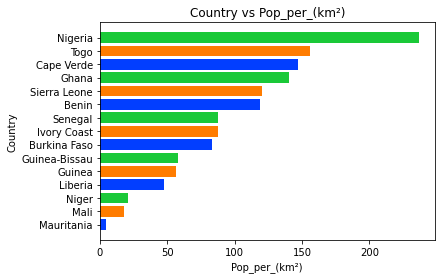

In [74]:

colors = sns.color_palette('bright')[0:3]
x = pop_sqm['Country'] 
y = pop_sqm['Pop_per_(km²)']

plt.barh(x, y, color = colors)
plt.ylabel('Country')
plt.xlabel('Pop_per_(km²)')
plt.title('Country vs Pop_per_(km²)')

plt.show()

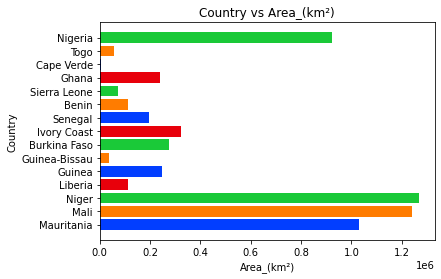

In [77]:
colors = sns.color_palette('bright')[0:4]
x = pop_sqm['Country'] 
y = pop_sqm['Area_(km²)']

plt.barh(x, y, color = colors)
plt.ylabel('Country')
plt.xlabel('Area_(km²)')
plt.title('Country vs Area_(km²)')

plt.show()

### Problem Statement and Conclusion

Problem Questions:
    
1.The most Populated West African country?

2.The least populated West African Country?

3.The countries with the least and highest growth rates?

4.What is the correlation between land mass and population?


CONCLUSION

1.Nigeria is the most populated West African country, infact, it is the most populated African country, and also the 6th most populated country in the world. As at 2022, her estimated population was 218,541,212. This is over 51.3% of the total West African population(426,373,559)

2.Cape Verde is the least populated West African country with about 593,149 people. Having the smallest landmass in West Africa (4033 (km²), it has the third highest Pop_per_(km²). This reveals that it is highly overcrowded, cost of living is likely very high due to scarce lands.

3.Nige Republic has the highest growth rate in West Africa, 1.0378% annual increase, Cape Verde is the least with 1.0089% growth rate.

4.Niger Republic is the largest West African country in terms of landmass, having an area of 1,267,000km². The other top four countries include Mali:1,240,192km², Mauritania:1,030,700km², and Nigeria:923,768km². In spite of Niger Republic being the largest West African country, it has the fourth highest populated West African country with about 2,6207,977 people.However, this population is scantily distributed across it's vast landmass.
